<a href="https://colab.research.google.com/github/K-julius/dl_project/blob/main/YOLO_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [4]:
model = YOLO("yolov8n.pt")

print(type(model.names), len(model.names))
print(model.names)

100%|██████████| 6.23M/6.23M [00:00<00:00, 227MB/s]

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

Data Path

In [7]:
dataset_path = "/content/drive/MyDrive/DL_project/archive"

#define the training and testing directories
train_dir = os.path.join(dataset_path, 'Training')
test_dir = os.path.join(dataset_path, 'Testing')

#define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

Load and Preprocess the Dataset

notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: Category, dtype: int64


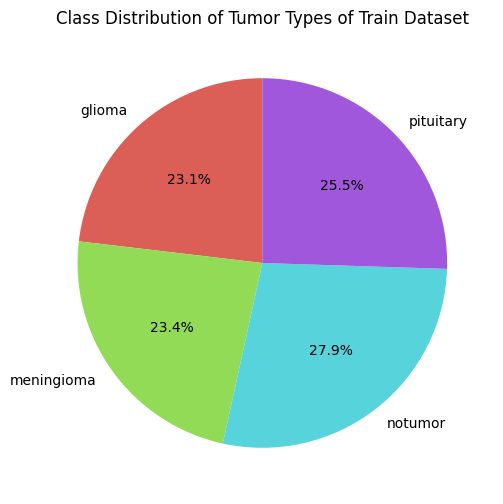

In [49]:
train_data = []

for category in categories:
    path = os.path.join(train_dir, category)
    images = os.listdir(path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image" : images, "Category": [category] * count, "Count" : [count]*count}))

    train_df = pd.concat(train_data, axis=0)

# Visualize the distribution of tumor types in the training dataset
# ratio = train_df["Count"].unique()
print(train_df['Category'].value_counts())
ratio = [1321, 1339, 1595, 1457] #glioma, meningioma, notumor, pituitary
total = sum(ratio)
percent = [(i/total) * 100 for i in ratio]
colors = sns.color_palette('hls',len(ratio))
plt.figure(figsize=(8, 6))
plt.pie(percent, colors=colors, labels = categories, autopct = '%1.1f%%', startangle = 90)
plt.title("Class Distribution of Tumor Types of Train Dataset")
plt.show()

notumor       405
meningioma    306
glioma        300
pituitary     300
Name: Category, dtype: int64


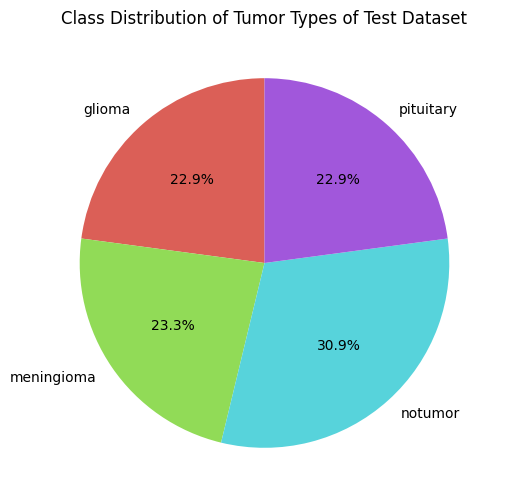

In [47]:
test_data = []

for category in categories:
    path = os.path.join(test_dir, category)
    images = os.listdir(path)
    count = len(images)
    test_data.append(pd.DataFrame({"Image" : images, "Category": [category] * count, "Count" : [count]*count}))

    test_df = pd.concat(test_data, axis=0)

# Visualize the distribution of tumor types in the training dataset

print(test_df['Category'].value_counts())
ratio = [300, 306, 405, 300] #glioma, meningioma, notumor, pituitary
total = sum(ratio)
percent = [(i/total) * 100 for i in ratio]
colors = sns.color_palette('hls',len(ratio))
plt.figure(figsize=(8, 6))
plt.pie(percent, colors=colors, labels = categories, autopct = '%1.1f%%', startangle = 90)
plt.title("Class Distribution of Tumor Types of Test Dataset")
plt.show()

set up the image size, batch size, epoch

In [51]:
image_size = (150, 150)
batch_size = 32
epochs = 50